# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check out labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

Our data is a little hard to understand right now... let's visualize it!

In [4]:
import pandas as pd
circles = pd.DataFrame({ "X0": X[:, 0], "X1": X[:, 1], "label": y })
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [5]:
circles["label"].value_counts()

label
1    500
0    500
Name: count, dtype: int64

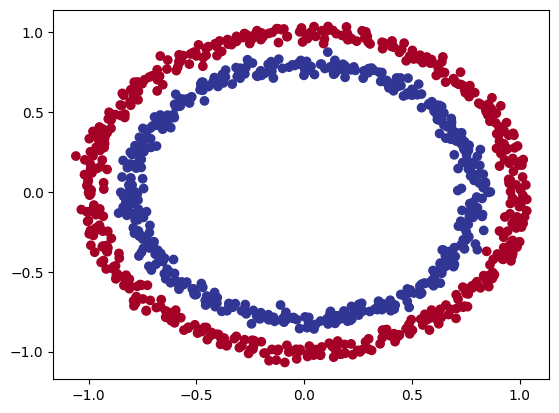

In [6]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

🛠️ **Exercise:** Before pushing forward, spend 10-minutes playing around with [playground.tensorflow.org](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.86868&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) building and running different neural networks. See what happens when you change different hyperparameters.

## Input and output shapes

In [7]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# How many samples we're working
len(X), len(y)

(1000, 1000)

In [9]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [10]:
# Import TensorFlow
import tensorflow as tf
tf.__version__

2025-07-14 09:08:10.520236: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-14 09:08:10.522177: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-14 09:08:10.562425: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-07-14 09:08:10.562481: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-07-14 09:08:10.564119: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

'2.15.0'

In [11]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5


2025-07-14 09:08:12.946488: I tensorflow/core/common_runtime/next_pluggable_device/next_pluggable_device_factory.cc:118] Created 1 TensorFlow NextPluggableDevices. Physical device type: XPU
2025-07-14 09:08:14.220919: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type XPU is enabled.


32/32 [==============================] - 16s 15ms/step - loss: 5.4973 - accuracy: 0.4840
Epoch 2/5
32/32 [==============================] - 9s 277ms/step - loss: 4.7876 - accuracy: 0.4670
Epoch 3/5
32/32 [==============================] - -8s -267932us/step - loss: 4.2400 - accuracy: 0.4690
Epoch 4/5
32/32 [==============================] - 0s 11ms/step - loss: 2.0143 - accuracy: 0.4890
Epoch 5/5
32/32 [==============================] - 0s 11ms/step - loss: 0.7327 - accuracy: 0.5030


In [12]:
# Let's try and improve our model by training for longer...
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 10ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy... it's performing as if it's guessing.

So let's step things up a notch and add an extra layer.

In [13]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [14]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 9ms/step - loss: 0.6942 - accuracy: 0.5000


[0.6942211985588074, 0.5]

In [15]:
circles["label"].value_counts()

label
1    500
0    500
Name: count, dtype: int64

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we mightto add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might to choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer).

In [16]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10), # add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [17]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 8ms/step - loss: 0.6956 - accuracy: 0.5120


[0.6955760717391968, 0.5120000243186951]

To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [18]:
import numpy as np

In [19]:
def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predictiong on X.
    This function was inspired by two resources:
        1. https://cs231n.github.io/neural-networks-case-study/
        2. https://psrivasin.medium.com/plotting-decision-boundaries-using-numpy-and-matplotlib-f5613d8acd19#:~:text=A%20decision%20boundary%20is%20a,side%20of%20the%20decision%20boundary.
    """
    
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Create X value (we're going to make predictions on theese)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
    
    # Make predictions
    y_pred = model.predict(x_in)
    
    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [20]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

313/313 [==============================] - 1s 3ms/step
doing binary classification


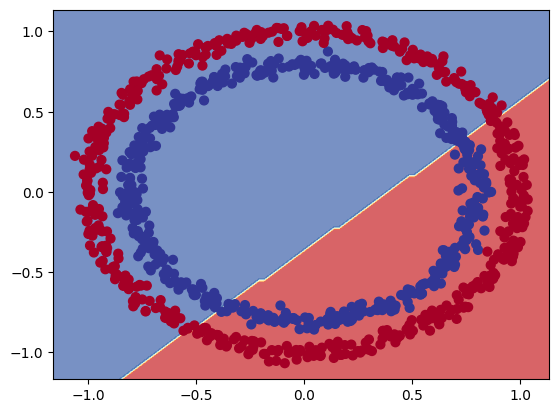

In [21]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [22]:
# Let's see if our model can be used for a regression problem...

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

X_regression, y_regression

(<tf.Tensor: shape=(200,), dtype=int32, numpy=
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
        390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
        455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
        520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
        585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
        650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
        715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775,
        780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840,
    

In [23]:
# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100


ValueError: in user code:

    File "/home/administrator/anaconda3/envs/idp/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/home/administrator/anaconda3/envs/idp/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/administrator/anaconda3/envs/idp/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/home/administrator/anaconda3/envs/idp/lib/python3.11/site-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/home/administrator/anaconda3/envs/idp/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/administrator/anaconda3/envs/idp/lib/python3.11/site-packages/keras/src/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=int32)
      • training=True
      • mask=None


Oh wait... we compiled our model for a binary classification problem.

But... we're now working on a regression problem, let's change the model to suit our data.

In [24]:
# Setup random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model, this time with a regression-specific loss function
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 20ms/step - loss: 474.3493 - mae: 474.3493
Epoch 2/100
5/5 [==============================] - 0s 17ms/step - loss: 361.0649 - mae: 361.0649
Epoch 3/100
5/5 [==============================] - 0s 18ms/step - loss: 251.8952 - mae: 251.8952
Epoch 4/100
5/5 [==============================] - 0s 20ms/step - loss: 138.4596 - mae: 138.4596
Epoch 5/100
5/5 [==============================] - 0s 16ms/step - loss: 50.7784 - mae: 50.7784
Epoch 6/100
5/5 [==============================] - 0s 17ms/step - loss: 85.4430 - mae: 85.4430
Epoch 7/100
5/5 [==============================] - 0s 16ms/step - loss: 79.4817 - mae: 79.4817
Epoch 8/100
5/5 [==============================] - 0s 17ms/step - loss: 48.3877 - mae: 48.3877
Epoch 9/100
5/5 [==============================] - 0s 18ms/step - loss: 49.5290 - mae: 49.5290
Epoch 10/100
5/5 [==============================] - 0s 18ms/step - loss: 45.4736 - mae: 45.4736
Epoch 11/100
5/5 [=======================

2/2 [==============================] - 0s 5ms/step


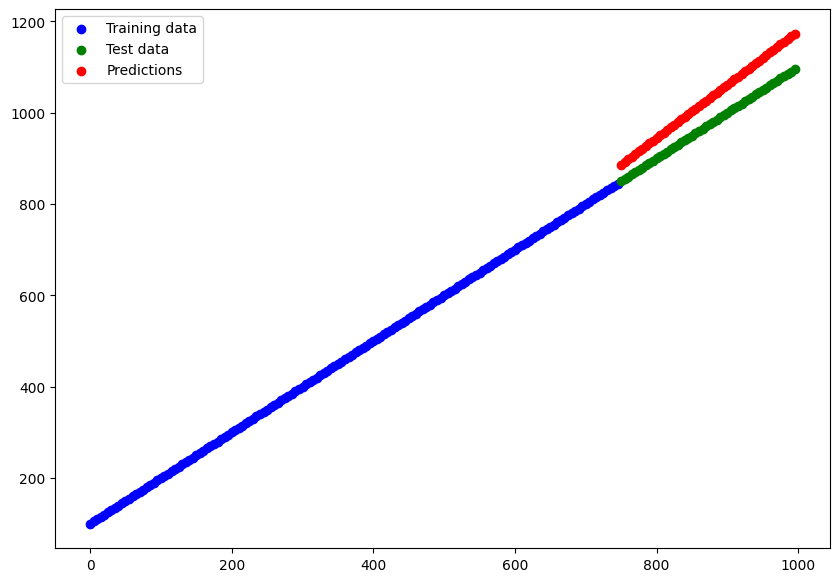

In [25]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

## The missing piece: Non-linearity

In [26]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - -8s 12ms/step - loss: 6.3590 - accuracy: 0.4840
Epoch 2/100
32/32 [==============================] - 0s 12ms/step - loss: 6.3452 - accuracy: 0.4850
Epoch 3/100
32/32 [==============================] - 0s 12ms/step - loss: 6.3428 - accuracy: 0.4840
Epoch 4/100
32/32 [==============================] - 0s 12ms/step - loss: 6.3410 - accuracy: 0.4850
Epoch 5/100
32/32 [==============================] - 0s 11ms/step - loss: 6.3431 - accuracy: 0.4850
Epoch 6/100
32/32 [==============================] - 0s 13ms/step - loss: 6.3280 - accuracy: 0.4850
Epoch 7/100
32/32 [==============================] - 0s 14ms/step - loss: 6.3276 - accuracy: 0.4840
Epoch 8/100
32/32 [==============================] - 0s 14ms/step - loss: 6.3273 - accuracy: 0.4840
Epoch 9/100
32/32 [==============================] - 0s 15ms/step - loss: 6.3272 - accuracy: 0.4840
Epoch 10/100
32/32 [==============================] - 0s 14ms/step - loss: 6.3269 - accuracy: 0.484

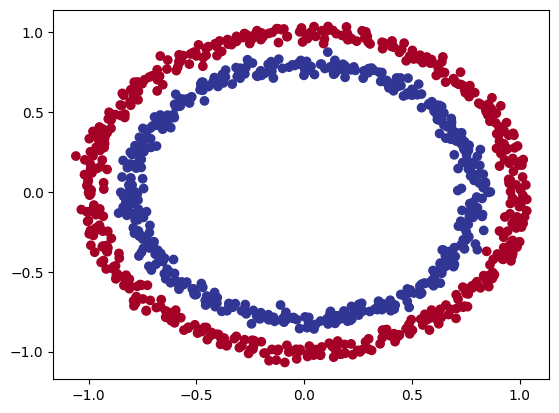

In [27]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 1s 3ms/step
doing binary classification


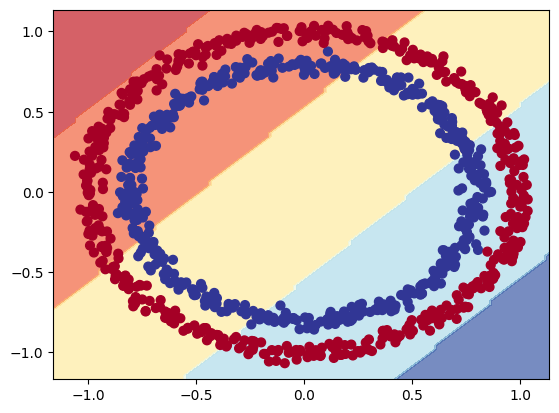

In [28]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

Let's try build our first neural network with a non-linear activation function.

In [29]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
onednn_verbose,v1,info,oneDNN v3.8.0 (commit 5dc2e69f319ab59520c9096436488c11ab86fd93)
onednn_verbose,v1,info,cpu,runtime:DPC++,nthr:1
onednn_verbose,v1,info,cpu,isa:Intel AVX2 with Intel DL Boost, float16 and bfloat16 support
onednn_verbose,v1,info,gpu,runtime:DPC++
onednn_verbose,v1,info,cpu,engine,sycl cpu device count:1 
onednn_verbose,v1,info,cpu,engine,0,backend:OpenCL,name:Intel(R) Core(TM) Ultra 7 258V,driver_version:2025.20.6
onednn_verbose,v1,info,gpu,engine,sycl gpu device count:1 
onednn_verbose,v1,info,gpu,engine,0,backend:Level Zero,name:Intel(R) Graphics [0x64a0],driver_version:1.6.33944,binary_kernels:enabled
onednn_verbose,v1,info,graph,backend,0:dnnl_backend
onednn_verbose,v1,info,experimental features are enabled
onednn_verbose,v1,info,use batch_normalization stats one pass is enabled
onednn_verbose,v1,info,GPU convolution v2 is disabled
onednn_verbose,v1,info,experimental functionality for sparse domain is enabled
onednn_verbose,v1,primitive,info,templat

In [30]:
# Time to replicate the multi-layer neural network from TensorFlow playground in code...

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_6.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 23ms/step - loss: 4.4765 - accuracy: 0.4940
Epoch 2/250
32/32 [==============================] - 1s 23ms/step - loss: 4.1412 - accuracy: 0.4290
Epoch 3/250
32/32 [==============================] - 1s 25ms/step - loss: 3.4064 - accuracy: 0.4400
Epoch 4/250
32/32 [==============================] - 0s 7ms/step - loss: 2.4298 - accuracy: 0.4550
Epoch 5/250
32/32 [==============================] - 1s 29ms/step - loss: 1.0482 - accuracy: 0.4640
Epoch 6/250
32/32 [==============================] - 1s 26ms/step - loss: 0.9624 - accuracy: 0.4510
Epoch 7/250
32/32 [==============================] - 1s 22ms/step - loss: 0.9269 - accuracy: 0.4560
Epoch 8/250
32/32 [==============================] - 1s 21ms/step - loss: 0.9003 - accuracy: 0.4560
Epoch 9/250
32/32 [==============================] - 1s 25ms/step - loss: 0.8782 - accuracy: 0.4510
Epoch 10/250
32/32 [==============================] - 1s 24ms/step - loss: 0.8586 - accuracy: 0.4510


In [31]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 1s 14ms/step - loss: 0.0566 - accuracy: 0.9810


[0.05655858293175697, 0.9810000658035278]

313/313 [==============================] - 2s 5ms/step
doing binary classification


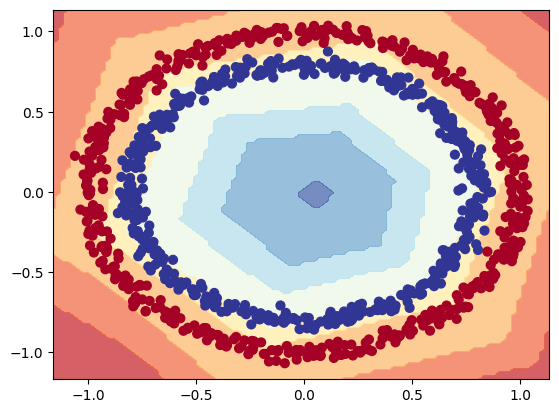

In [32]:
# How do our model predictions look?
plot_decision_boundary(model=model_6, X=X, y=y)

In [33]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 24ms/step - loss: 0.7107 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 1s 28ms/step - loss: 0.6990 - accuracy: 0.5090
Epoch 3/100
32/32 [==============================] - 9s 291ms/step - loss: 0.6922 - accuracy: 0.5100
Epoch 4/100
32/32 [==============================] - -8s -253521us/step - loss: 0.6885 - accuracy: 0.5200
Epoch 5/100
32/32 [==============================] - 1s 27ms/step - loss: 0.6862 - accuracy: 0.5190
Epoch 6/100
32/32 [==============================] - 1s 27ms/step - loss: 0.6848 - accuracy: 0.5190
Epoch 7/100
32/32 [==============================] - 1s 27ms/step - loss: 0.6840 - accuracy: 0.5180
Epoch 8/100
32/32 [==============================] - 1s 27ms/step - loss: 0.6836 - accuracy: 0.5250
Epoch 9/100
32/32 [==============================] - 1s 32ms/step - loss: 0.6831 - accuracy: 0.5290
Epoch 10/100
32/32 [==============================] - -8s -246264us/step - loss: 0.6827 - acc

In [34]:
# 4. Evaluate our model
model_7.evaluate(X, y)

32/32 [==============================] - -8s 21ms/step - loss: 0.4635 - accuracy: 0.8410


[0.4634664058685303, 0.8410000205039978]

313/313 [==============================] - 2s 7ms/step
doing binary classification


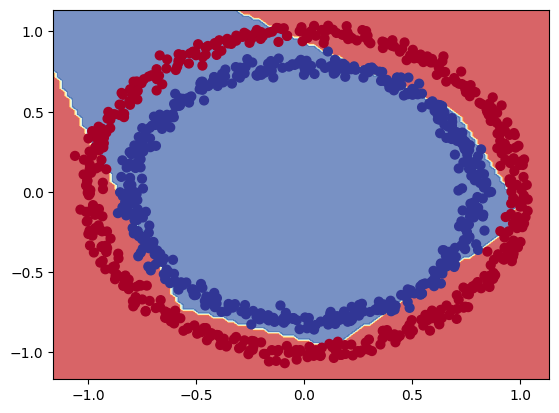

In [35]:
# Let's visualize our incredible metrics
plot_decision_boundary(model_7, X, y)

🤔 **Question:** What's wrong the predictions we've made? Are we really evaluating our model correctly? Hint: what data did the model learn on and what data did we predict on?

🔑 **Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

Now we've discussed the concept of linear and non-linear functions (or lines), let's see them in action.

In [36]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

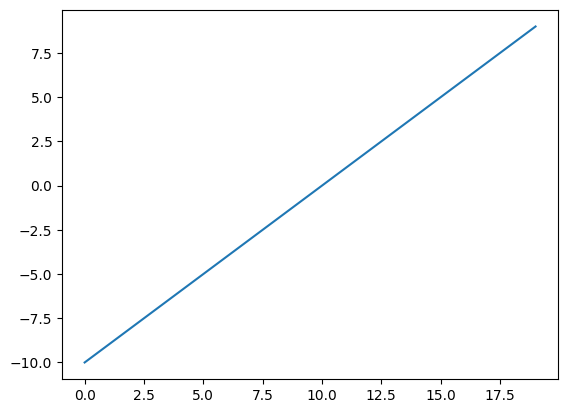

In [37]:
# Visualize our toy tensor
plt.plot(A)

In [38]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.53978719e-05, 1.23394580e-04, 3.35350138e-04, 9.11051175e-04,
       2.47262302e-03, 6.69285143e-03, 1.79862101e-02, 4.74258736e-02,
       1.19202934e-01, 2.68941432e-01, 5.00000000e-01, 7.31058598e-01,
       8.80797029e-01, 9.52574193e-01, 9.82013762e-01, 9.93307173e-01,
       9.97527421e-01, 9.99089003e-01, 9.99664664e-01, 9.99876618e-01],
      dtype=float32)>

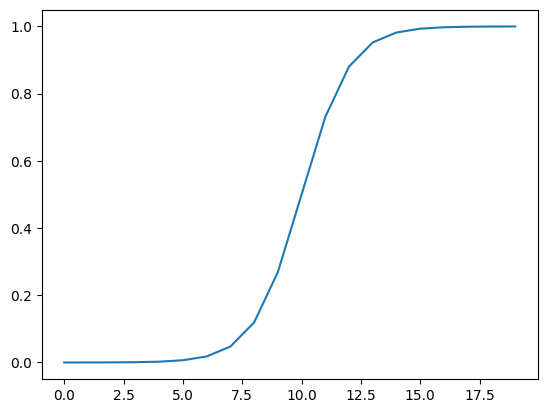

In [39]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [40]:
# Let's recreate the relu function
def relu(x):
    return tf.maximum(0, x)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

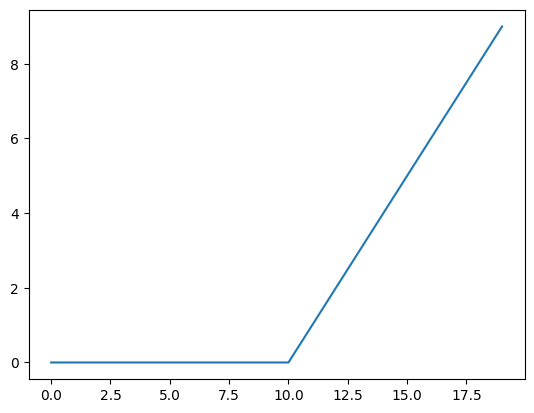

In [41]:
# Plot ReLu-modified tensor
plt.plot(relu(A))

In [42]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

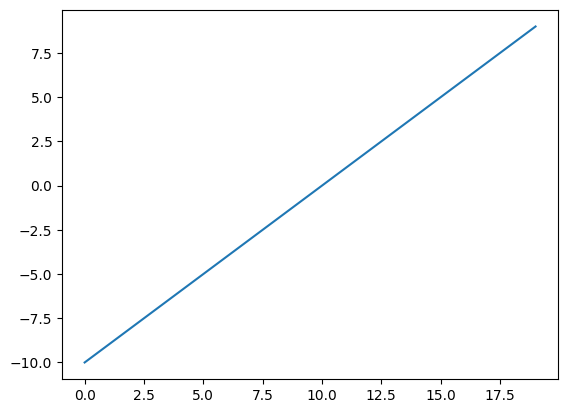

In [43]:
# Does the linear activation function change anything?
plt.plot(tf.keras.activations.linear(A))

In [44]:
# Does A even change?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification

So far we've been training and testing on the same dataset...

However, in machine learning this is is basically a sin.

So let's create a training and test set.

In [45]:
# Check how many examples we have
len(X)

1000

In [46]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((800, 2), (200, 2), (800,), (200,))

In [47]:
# Let's recreate a model to fit on the training data and evaluate on the testing data

# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_7)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 2s 16ms/step - loss: 0.6877 - accuracy: 0.5325
Epoch 2/25
25/25 [==============================] - 0s 19ms/step - loss: 0.6809 - accuracy: 0.5387
Epoch 3/25
25/25 [==============================] - 0s 18ms/step - loss: 0.6769 - accuracy: 0.5350
Epoch 4/25
25/25 [==============================] - 0s 19ms/step - loss: 0.6713 - accuracy: 0.5387
Epoch 5/25
25/25 [==============================] - -0s -4062us/step - loss: 0.6644 - accuracy: 0.5625
Epoch 6/25
25/25 [==============================] - 1s 20ms/step - loss: 0.6554 - accuracy: 0.5700
Epoch 7/25
25/25 [==============================] - 1s 20ms/step - loss: 0.6412 - accuracy: 0.6700
Epoch 8/25
25/25 [==============================] - 0s 20ms/step - loss: 0.6312 - accuracy: 0.6800
Epoch 9/25
25/25 [==============================] - 0s 19ms/step - loss: 0.6122 - accuracy: 0.6750
Epoch 10/25
25/25 [==============================] - 1s 21ms/step - loss: 0.5912 - accuracy: 0.7088
Epoch

In [48]:
# 4. Evaluate the model on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - -0s -1429157us/step - loss: 0.2686 - accuracy: 0.9900


[0.2685714364051819, 0.9899999499320984]

313/313 [==============================] - 2s 6ms/step
doing binary classification
313/313 [==============================] - 2s 6ms/step
doing binary classification


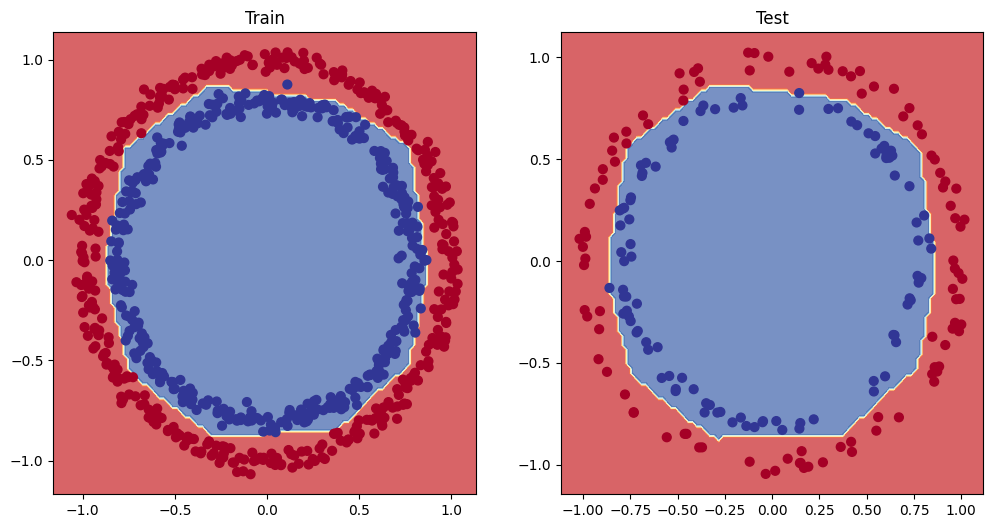

In [49]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show();

## Plot the loss (or training) curves

In [50]:
history.history

{'loss': [0.6876624822616577,
  0.6809254884719849,
  0.6769248843193054,
  0.671329915523529,
  0.6643791198730469,
  0.6553528308868408,
  0.641240656375885,
  0.6311639547348022,
  0.612169623374939,
  0.5911921262741089,
  0.5739613771438599,
  0.5526840686798096,
  0.5330297350883484,
  0.5142161846160889,
  0.49767181277275085,
  0.4806085526943207,
  0.4604089558124542,
  0.4412102699279785,
  0.4287455976009369,
  0.4077955484390259,
  0.37384238839149475,
  0.35017871856689453,
  0.33209383487701416,
  0.31484413146972656,
  0.29184436798095703],
 'accuracy': [0.5324999690055847,
  0.5387499928474426,
  0.5349999666213989,
  0.5387499928474426,
  0.5625,
  0.5699999928474426,
  0.6699999570846558,
  0.6800000071525574,
  0.675000011920929,
  0.7087500095367432,
  0.7099999785423279,
  0.737500011920929,
  0.7262499928474426,
  0.7949999570846558,
  0.76624995470047,
  0.8100000023841858,
  0.7999999523162842,
  0.8399999737739563,
  0.85999995470047,
  0.9024999737739563,
  0.

In [51]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.687662,0.53250
1,0.680925,0.53875
2,0.676925,0.53500
3,0.671330,0.53875
4,0.664379,0.56250
5,0.655353,0.57000
6,0.641241,0.67000
7,0.631164,0.68000
8,0.612170,0.67500
9,0.591192,0.70875


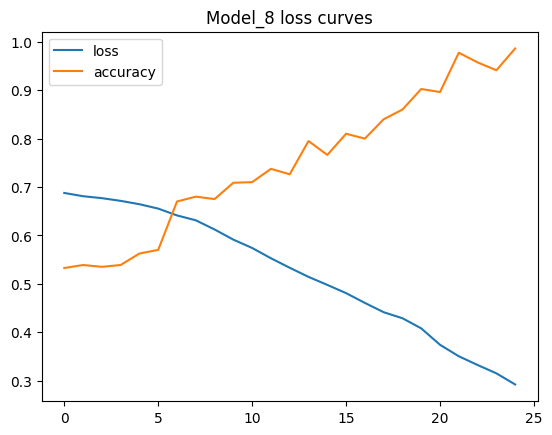

In [52]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves");

🔑 **Note:** For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases tho most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your *while* its training.
* Another model (we could use the same one as above, but we're practicing building models here).
* A modified loss curves plot.

In [53]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 2s 16ms/step - loss: 0.6954 - accuracy: 0.4963 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 19ms/step - loss: 0.6953 - accuracy: 0.4963 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 1s 20ms/step - loss: 0.6952 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 9s 358ms/step - loss: 0.6951 - accuracy: 0.4963 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - -8s -340537us/step - loss: 0.6950 - accuracy: 0.4950 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 1s 21ms/step - loss: 0.6948 - accuracy: 0.4937 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 19ms/step - loss: 0.6947 - accuracy: 0.4937 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 18ms/step - loss: 0.6945 - accuracy: 0.4937 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 1

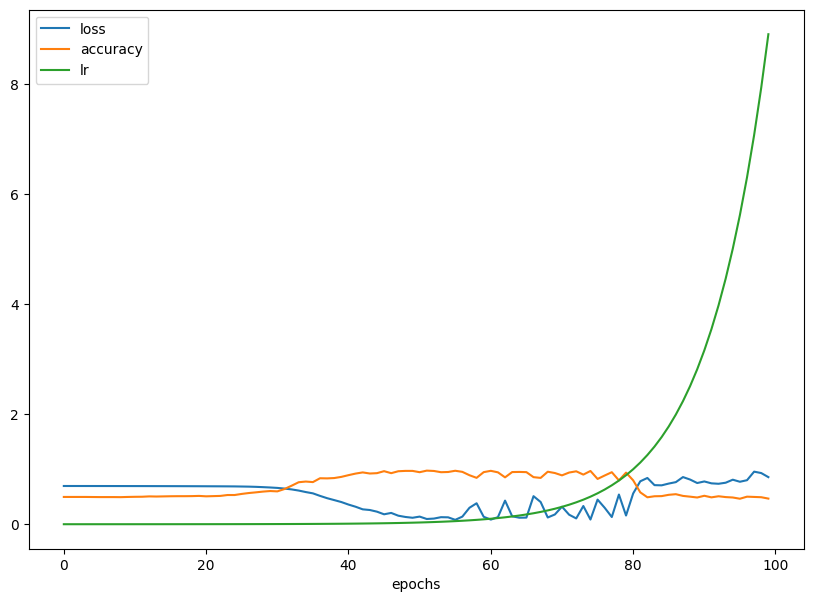

In [54]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs");

Text(0.5, 1.0, 'Learning rate vs Loss')

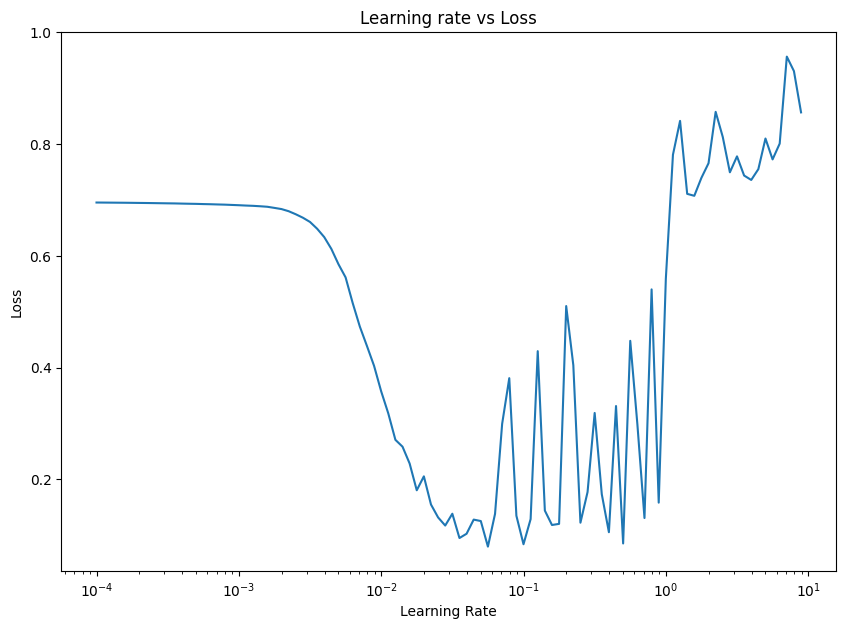

In [55]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

In [56]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [57]:
# Learning rate we used before (model_8)
10**-2

0.01

In [58]:
# Let's try using a higher *ideal* learning rate with the same model as before

# Set random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - -8s 11ms/step - loss: 0.6850 - accuracy: 0.5188
Epoch 2/20
25/25 [==============================] - 0s 13ms/step - loss: 0.6740 - accuracy: 0.5825
Epoch 3/20
25/25 [==============================] - 0s 12ms/step - loss: 0.6585 - accuracy: 0.6100
Epoch 4/20
25/25 [==============================] - 0s 11ms/step - loss: 0.6274 - accuracy: 0.7088
Epoch 5/20
25/25 [==============================] - 0s 12ms/step - loss: 0.5914 - accuracy: 0.7337
Epoch 6/20
25/25 [==============================] - 0s 12ms/step - loss: 0.5452 - accuracy: 0.7675
Epoch 7/20
25/25 [==============================] - 0s 12ms/step - loss: 0.5017 - accuracy: 0.8062
Epoch 8/20
25/25 [==============================] - 0s 10ms/step - loss: 0.4460 - accuracy: 0.8212
Epoch 9/20
25/25 [==============================] - 0s 12ms/step - loss: 0.4298 - accuracy: 0.8237
Epoch 10/20
25/25 [==============================] - 0s 11ms/step - loss: 0.3879 - accuracy: 0.8525
Epoch 11

In [59]:
# Evaluate model 10 on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 12ms/step - loss: 0.0452 - accuracy: 0.9900


[0.04518301412463188, 0.9899999499320984]

In [60]:
# Evaluate model 8 on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 10ms/step - loss: 0.2686 - accuracy: 0.9900


[0.2685714364051819, 0.9899999499320984]

313/313 [==============================] - 1s 3ms/step
doing binary classification
313/313 [==============================] - 1s 3ms/step
doing binary classification


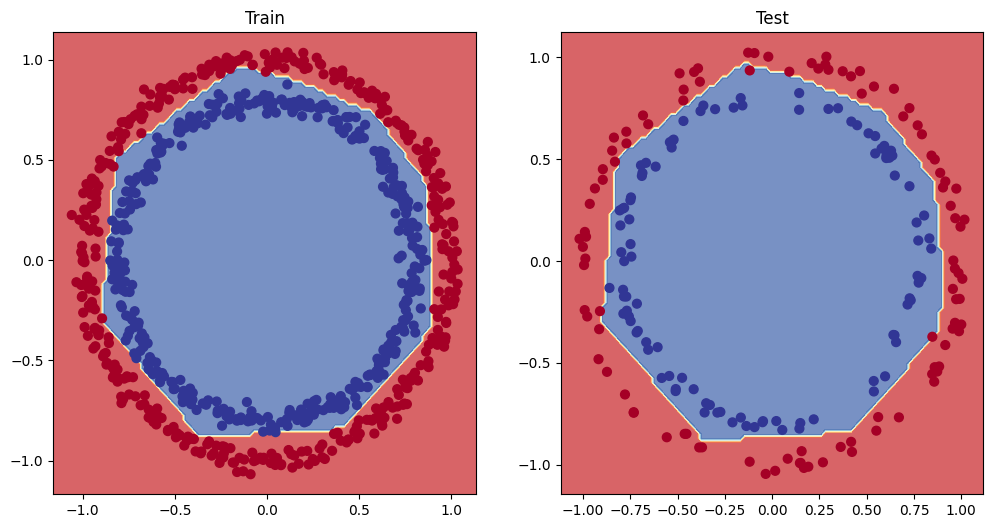

In [61]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()


## More Classification evaluation methods

Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit-learn) - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [62]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 11ms/step - loss: 0.0452 - accuracy: 0.9900
Model loss on the test set: 0.04518301412463188
Model accuracy on the test set: 99.00%


## How about a confusion matrix?

In [63]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make prediction
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 4ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [64]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [65]:
y_preds[:10]

array([[9.7950816e-01],
       [9.9872893e-01],
       [9.8957962e-01],
       [9.7503734e-01],
       [6.8906911e-02],
       [7.9602184e-04],
       [9.8748356e-01],
       [8.2103899e-03],
       [9.9252301e-01],
       [7.1258061e-02]], dtype=float32)

Oops... looks like our predictions array has come out in **prediction probability** form... the standard output from the sigmoid (or softmax) activation functions.

In [66]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [67]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 0, 99]])

## How about we prettify our confusion matrix?

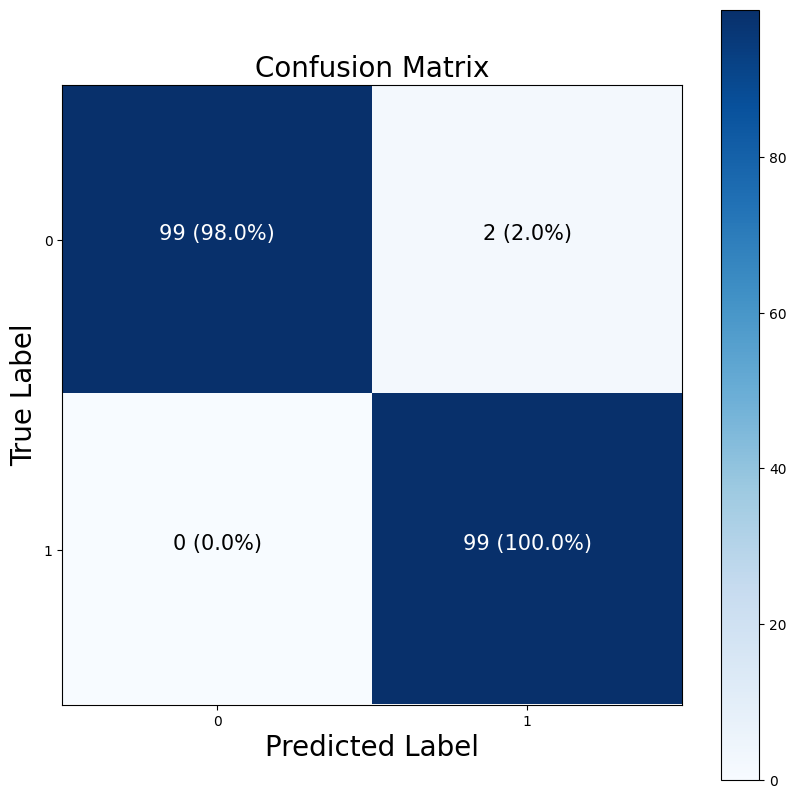

In [68]:
# Note: the confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix
# https://scikit-learn.org/1.0/modules/generated/sklearn.metrics.plot_confusion_matrix.html

import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])
    
# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_ticks_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=15)

# Working with a larger example (multiclass classification)

When you have more than two classes as an option, it's known as **multi-class classification**.
* This means if you have 3 different classes, it's multi-class classification.
* It also means if you have 100 different classes, it's multi-class classification.

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.

In [69]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [70]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [71]:
# Check the shape of single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

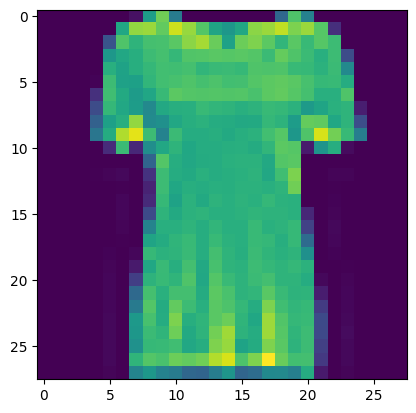

In [72]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[10])

In [73]:
# Check out sample label
train_labels[10]

0

In [74]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Coat')

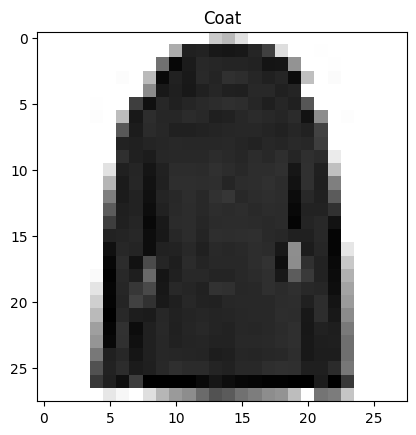

In [75]:
# Plot an example image and its label
index_of_choice = 2000
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

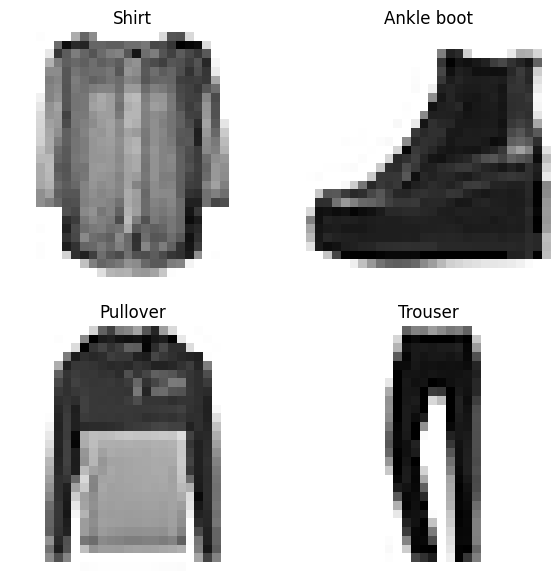

In [76]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

## Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things:
* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
    * If your labels are one-hot encoded, use CatergoricalCrossentropy()
    * If your labels are integer form use SparseCategoricalCrossentropy()
* Output layer activation = Softmax (not sigmoid)

In [77]:
# our data needs to be flattened (from 28*28 to None, 784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape

(None, 784)

In [78]:
28 * 28

784

In [79]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [80]:
tf.one_hot(train_labels[:10], depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [81]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile the model
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data, 
                                tf.one_hot(train_labels, depth=10),
                                epochs=10,
                                validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 28s 12ms/step - loss: 2.2477 - accuracy: 0.1353 - val_loss: 2.1476 - val_accuracy: 0.1447
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 1.8919 - accuracy: 0.2315 - val_loss: 1.7198 - val_accuracy: 0.2855
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 1.6732 - accuracy: 0.2940 - val_loss: 1.6672 - val_accuracy: 0.2788
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 1.6195 - accuracy: 0.3048 - val_loss: 1.6074 - val_accuracy: 0.3171
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 1.5800 - accuracy: 0.3251 - val_loss: 1.5315 - val_accuracy: 0.3544
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 1.4938 - accuracy: 0.3767 - val_loss: 1.3933 - val_accuracy: 0.4226
Epoch 7/10
1875/1875 [==============================] - 18s 9ms/step - loss: 1.3632 - accuracy: 0.4331 - val_loss: 1.3222 - 

In [82]:
# Check the model summary
model_11.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 4)                 3140      
                                                                 
 dense_27 (Dense)            (None, 4)                 20        
                                                                 
 dense_28 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [83]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns between 0 & 1.

In [84]:
# We can get our training and testing data between 0 & 1 by dividing by the maximum
train_data_norm = train_data / train_data.max()
test_data_norm = test_data / test_data.max()

# check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [85]:
# Now our data is normalized, let's build a model to find patterns in it

# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_11)
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 27s 11ms/step - loss: 1.5714 - accuracy: 0.4141 - val_loss: 1.2084 - val_accuracy: 0.5217
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 1.0265 - accuracy: 0.6293 - val_loss: 0.9480 - val_accuracy: 0.6668
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.8766 - accuracy: 0.6970 - val_loss: 0.8679 - val_accuracy: 0.6896
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.8177 - accuracy: 0.7217 - val_loss: 0.8135 - val_accuracy: 0.7260
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.7721 - accuracy: 0.7406 - val_loss: 0.7706 - val_accuracy: 0.7396
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.7221 - accuracy: 0.7496 - val_loss: 0.7637 - val_accuracy: 0.7436
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.7026 - accuracy: 0.7556 - val_loss: 0.7296 - 

> 🔑 **Note:** Neural networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 & 1).

<Axes: title={'center': 'Normalized data'}>

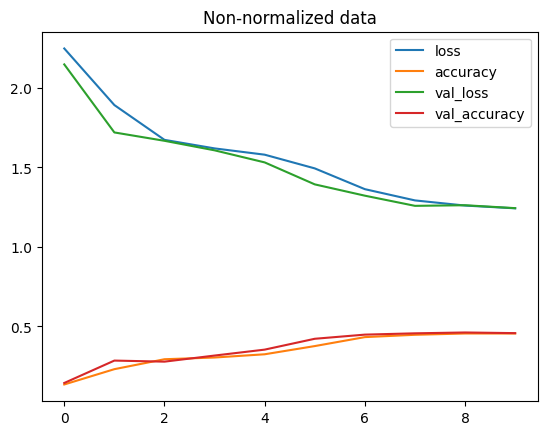

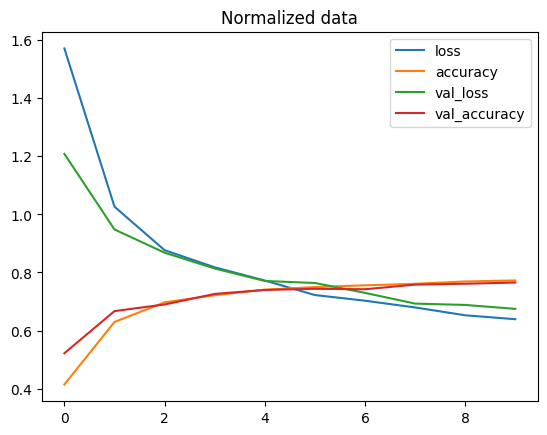

In [86]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

> 🔑 **Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g same architecture but different data or same data but different architecture).

## Finding the ideal learning rate

In [87]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 32s 17ms/step - loss: 1.2372 - accuracy: 0.5425 - val_loss: 0.7764 - val_accuracy: 0.7144 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 29s 15ms/step - loss: 0.7099 - accuracy: 0.7305 - val_loss: 0.6669 - val_accuracy: 0.7306 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 31s 16ms/step - loss: 0.6510 - accuracy: 0.7393 - val_loss: 0.6408 - val_accuracy: 0.7361 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 24s 13ms/step - loss: 0.6337 - accuracy: 0.7465 - val_loss: 0.6474 - val_accuracy: 0.7364 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 19s 10ms/step - loss: 0.6128 - accuracy: 0.7499 - val_loss: 0.6312 - val_accuracy: 0.7522 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 19s 10ms/step - loss: 0.5975 - accuracy: 0.7718 - val_loss: 0.5915 - val_accuracy: 0.7706 - lr: 0.0018
Epoch 7/40
1875/1875 [========================

Text(0.5, 1.0, 'Finding the ideal learning rate')

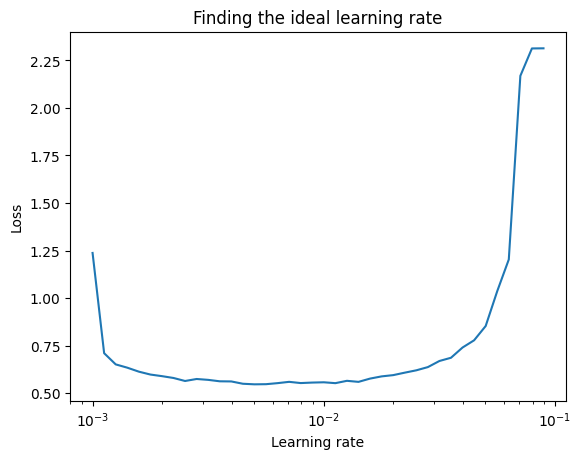

In [88]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [89]:
10**-3

0.001

In [90]:
# Let's refit a model with the ideal learning rate

# Set random seed
tf.random.set_seed(42)

# Create model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

# Fit the model
history_14 = model_14.fit(train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 30s 16ms/step - loss: 1.0270 - accuracy: 0.6436 - val_loss: 0.7666 - val_accuracy: 0.7411
Epoch 2/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.6466 - accuracy: 0.7801 - val_loss: 0.6302 - val_accuracy: 0.7807
Epoch 3/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.5972 - accuracy: 0.7930 - val_loss: 0.5977 - val_accuracy: 0.7932
Epoch 4/20
1875/1875 [==============================] - 27s 15ms/step - loss: 0.5841 - accuracy: 0.8001 - val_loss: 0.6164 - val_accuracy: 0.7962
Epoch 5/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.5610 - accuracy: 0.8046 - val_loss: 0.5974 - val_accuracy: 0.7918
Epoch 6/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.5573 - accuracy: 0.8077 - val_loss: 0.5843 - val_accuracy: 0.7985
Epoch 7/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.5514 - accuracy: 0.8121 - val_loss: 0.5622 -

## Evaluating our multi-class classification model

To evaluate our multi-class classification model we could:
* Evaluate its performance using other classification metrics (such as a confusion metrix)
* Asses some of its predictions (through visualizations)
* Improve its results (by training it for longger or changing the architecture)
* Save ande export it for use in an application

Let's go through the top 2...

In [91]:
# Create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):

    # Create the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
    n_classes = cm.shape[0]
    
    # Let's prettify it
    fig, ax = plt.subplots(figsize=figsize)
    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)
    
    # Set labels to be classes
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])
    
    # Label the axes
    ax.set(title="Confusion Matrix",
           xlabel="Predicted Label",
           ylabel="True Label",
           xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           xticklabels=labels,
           yticklabels=labels)
    
    # Set x-axis labels to bottom
    ax.xaxis.set_ticks_position("bottom")
    ax.xaxis.tick_bottom()
    
    # Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)
    
    # Set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.
    
    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black",
                 size=text_size)

In [92]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [93]:
# Make some predictions with our model
y_probs = model_14.predict(test_data_norm) # probs is short for "prediction probabilities"

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 10s 30ms/step


array([[1.06316719e-07, 4.90646079e-15, 9.69703068e-11, 3.86191687e-07,
        1.51464979e-10, 4.10577267e-01, 3.14575857e-07, 1.11834005e-01,
        3.51315626e-04, 4.77236658e-01],
       [2.98777886e-04, 2.20036629e-08, 7.63193011e-01, 2.34628303e-07,
        1.50052622e-01, 1.83866422e-23, 8.64521116e-02, 8.48378018e-32,
        3.19839523e-06, 0.00000000e+00],
       [1.32067921e-03, 9.98236239e-01, 1.22306619e-05, 4.25784732e-04,
        1.42330521e-07, 7.38714797e-22, 5.05031812e-06, 6.14494282e-14,
        7.69108995e-12, 1.07313148e-29],
       [3.05149518e-03, 9.81259525e-01, 2.52615118e-05, 1.56334694e-02,
        1.34246636e-06, 3.38540394e-12, 2.64667451e-05, 2.48800097e-06,
        5.72405012e-09, 1.82355162e-13],
       [1.51609734e-01, 1.33823807e-04, 1.57417282e-01, 2.07835101e-02,
        4.46933508e-02, 4.11948475e-10, 6.19760394e-01, 2.50327558e-12,
        5.60197420e-03, 1.01523787e-23]], dtype=float32)

> 🔑 **Note:** Remember to make predictions on the same kind of data your model was trained on (e.g if your model was trained on normalized data, you'll want to make predictions on normalized data).

In [94]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([1.06316719e-07, 4.90646079e-15, 9.69703068e-11, 3.86191687e-07,
        1.51464979e-10, 4.10577267e-01, 3.14575857e-07, 1.11834005e-01,
        3.51315626e-04, 4.77236658e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [95]:
# Convert all of the predictions probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction label
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [96]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [97]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[730,  13,  22,  90,   6,   1, 126,   1,  11,   0],
       [  1, 943,  11,  40,   3,   0,   2,   0,   0,   0],
       [ 20,   3, 717,  14, 169,   0,  74,   0,   3,   0],
       [ 26,  21,   9, 832,  53,   1,  51,   3,   4,   0],
       [  1,   1, 123,  33, 794,   0,  47,   0,   1,   0],
       [  0,   0,   0,   1,   0, 910,   0,  45,  16,  28],
       [125,   2, 130,  75, 186,   0, 470,   1,  11,   0],
       [  0,   0,   0,   0,   0,  38,   0, 950,   3,   9],
       [  3,   0,   3,  13,   3,   5,  72,   5, 896,   0],
       [  0,   0,   0,   1,   0,  28,   0,  88,   1, 882]])

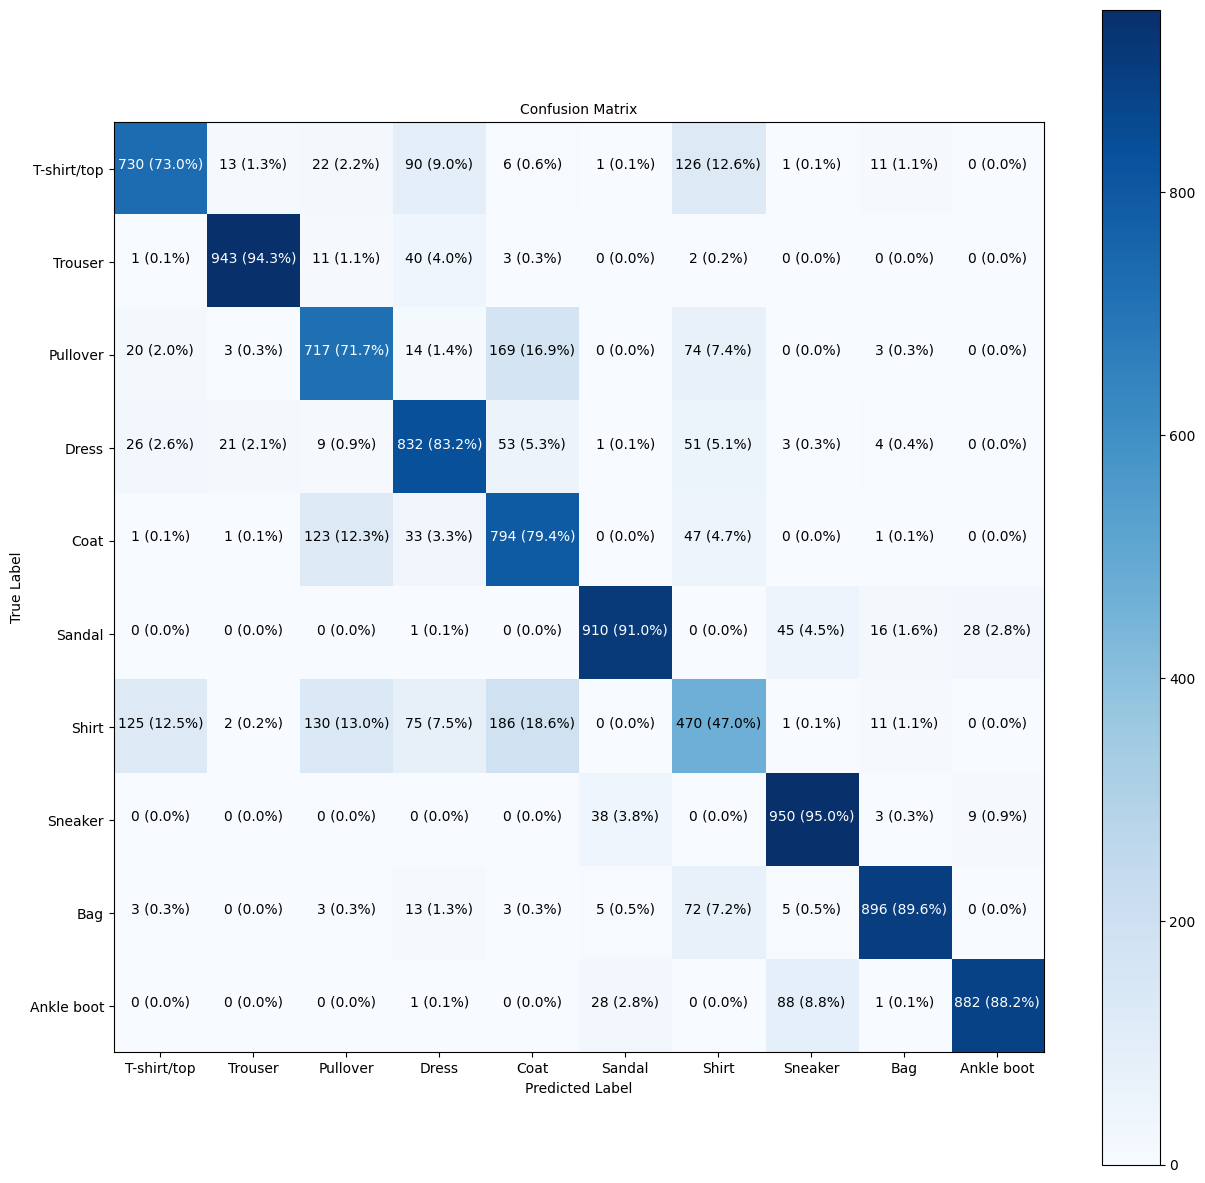

In [98]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

> 🔑 **Note:** Often when working with images and other forms of visual data, it's good idea to visualize as mush as posible to develop a further understanding of the data and the inputs and outputs of your models.

How about we create a fun little function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label & the predicted label

In [99]:
import random

def plot_random_image(model, images, true_labels, classes):
    """
    Picks a random image, plots it and labels it with a prediction and truth label.
    """
    # Set up random integer
    i = random.randint(0, len(images))
    
    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]
    
    # Plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)
    
    # Change the color of the titles depending on if the predistions is right or wrong
    if pred_label == true_label :
        color = "green"
    else:
        color = "red"
    
    # Add xlabel information (prediction/true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                     100*tf.reduce_max(pred_probs),
                                                     true_label),
               color=color) # set the color to green or red based on if prediction is right or wrong

1/1 [==============================] - 0s 16ms/step


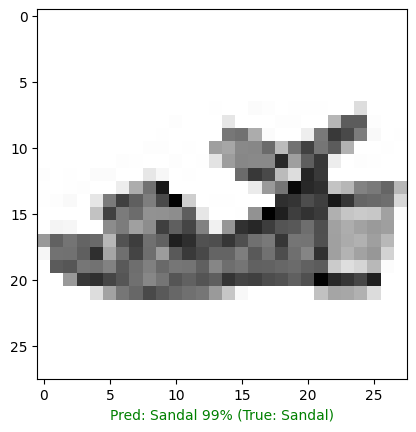

In [114]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data_norm, # always make predictions on the same kind of data your model was trained on
                  true_labels=test_labels,
                  classes=class_names)

## What patterns id our model learning?

In [101]:
# Find the layers of our most recent model
model_14.layers

In [102]:
# Extract a particular layer
model_14.layers[1]

In [103]:
# Get the patterns of a layer in our network
weigths, biases = model_14.layers[1].get_weights()

# Shapes
weigths, weigths.shape

(array([[-0.2752082 ,  0.02626461,  0.35528916, -0.2772861 ],
        [-0.85760325, -0.49936622,  0.85527796, -0.7061068 ],
        [-1.4523617 , -0.68888134,  0.27762455,  0.77963114],
        ...,
        [ 0.35928681, -0.269537  , -0.33781594,  0.0759749 ],
        [ 0.55811685,  0.16248402, -0.7072073 , -0.5234196 ],
        [ 0.23176448, -0.27796084, -0.11041673, -0.12952621]],
       dtype=float32),
 (784, 4))

In [104]:
28 * 28

784

In [105]:
model_14.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_35 (Dense)            (None, 4)                 3140      
                                                                 
 dense_36 (Dense)            (None, 4)                 20        
                                                                 
 dense_37 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Now let's check out the bias vector...

In [106]:
# Bias and biases shapes
biases, biases.shape

(array([-0.23610695,  1.4359092 ,  0.48373735,  1.4436961 ], dtype=float32),
 (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector get inititalized as zeros (at least in the case of a TensorFlow Dense Layer).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [107]:
model_14.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_35 (Dense)            (None, 4)                 3140      
                                                                 
 dense_36 (Dense)            (None, 4)                 20        
                                                                 
 dense_37 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


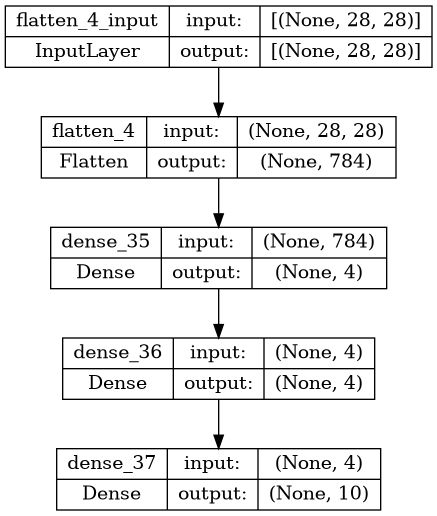

In [108]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)